In [25]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [26]:
source = 'http://bit.ly/w-data'
data = pd.read_csv(source)
data.head()

,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30


In [27]:
data.tail()

,Hours,Scores
20,2.70,30
21,4.80,54
22,3.80,35
23,6.90,76
24,7.80,86


In [28]:
data.describe()

,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


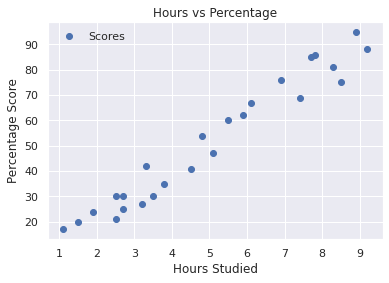

In [29]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', pad=5)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend(frameon=False)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split 

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
!pip install lazypredict


In [32]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 39/39 [00:00<00:00, 42.04it/s]

[09:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,R-Squared,RMSE,Time Taken
Model,,,
Lasso,0.94,4.36,0.01
Ridge,0.94,4.36,0.01
ElasticNetCV,0.94,4.38,0.14
SGDRegressor,0.94,4.46,0.01
LassoCV,0.94,4.46,0.06
RidgeCV,0.94,4.47,0.01
BayesianRidge,0.94,4.49,0.01
LinearRegression,0.94,4.51,0.01
TransformedTargetRegressor,0.94,4.51,0.01


As we can see frome the above code output that Lasso Regression has the highest accuracy then anyother Regression Algorithm.

In [33]:
#implementing Lasso Regression
from sklearn.linear_model import Lasso
regression = Lasso()
regression.fit(X_train, y_train)
print('Test scores')
print(regression.score(X_test, y_test))
print('\nTrain scores')
print(regression.score(X_train, y_train))

Test scores
0.9393762844243659

Train scores
0.9481895678598381


In [34]:
#for 9.25 hrs
no_hours = np.array([9.25])
no_hours = no_hours.reshape(-1, 1)
no_hours.shape

(1, 1)

In [35]:
prediction = regression.predict(no_hours)
print('Hours : 9.25')
print('Predicted Score:',prediction[0])

Hours : 9.25
Predicted Score: 93.27477397173055


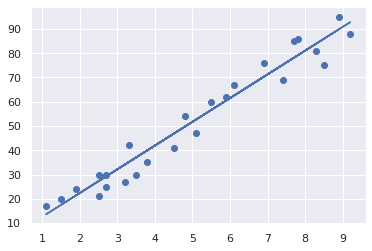

In [36]:
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [37]:
Y_pred = regression.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error: ', mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))

Mean Absolute Error:  3.939782794564405
Mean Squared Error: 19.493617604279418


In [39]:
#implementing Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)
print('Training score')
print(lr.score(X_train, y_train))
print('\nTest score')
print(lr.score(X_test, y_test))

Training score
0.9484509249326872

Test score
0.9367661043365056


In [40]:
lr_prediction = lr.predict(no_hours)
print('Hours : 9.25')
print('Predicted Score:',lr_prediction[0])

Hours : 9.25
Predicted Score: 93.89272889341652


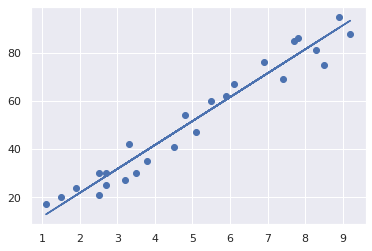

In [41]:
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [42]:
y_pred = lr.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error:  4.130879918502482
Mean Squared Error: 20.33292367497996
